# TITANIC DATASET

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
import warnings
warnings.filterwarnings ('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve,roc_auc_score

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking no of rows and cokumn in our dataset
df.shape

(891, 12)

## Columns Description
##### 1)Survived: Outcome of survival (0 = No; 1 = Yes)
##### 2)Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
##### 3)Name: Name of passenger
##### 4)Sex: Sex of the passenger(male or female)
##### 5)Age: Age of the passenger
##### 6)SibSp: Number of siblings and spouses of the passenger aboard
##### 7)Parch: Number of parents and children of the passenger aboard
##### 8)Ticket: Ticket number of the passenger
##### 9)Fare: Fare paid by the passenger
##### 10)Cabin: Cabin number of the passenger 
##### 11) Embarked: Port of embarkation of the passenger (C ; Q ; S )

In [6]:
# Checking stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
 # describe dont show object data type but isnull help us in that
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##                                  observation
#### 1) Total samples are 891 .
#### 2) Survived is a categorical feature with 0 or 1 values.
##### 3) Column with null values are  a) Age   ,   b) Cabin   and   c) Embarked
#### 4) Sex,Name,Ticket,Cabin,Embarked are object data type

In [9]:
#Let's check coloumns uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 148
Embarked : 4


In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df['Age'].value_counts().tail(10)

20.50    1
53.00    1
14.50    1
70.50    1
12.00    1
36.50    1
55.50    1
0.92     1
23.50    1
74.00    1
Name: Age, dtype: int64

In [14]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## observations
#### 1) There are fewer passenger with siblings and parents
#### 2) Male passenger count is more as compare to female passenger counts
#### 3) Most of the passenger opt for Pclass:"3"
#### 4) More then 60% passenger died  in mishap

In [17]:
#Dropping columns 'PassengerId and Name' as they are not necessary

df=df.drop(columns=['PassengerId','Name','Ticket'],axis=1)


#As most of its data is missing we are droping Cabin column too
df=df.drop(columns=['Cabin'],axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# replacing male and female into numerics using Label Encoder
from sklearn.preprocessing import LabelEncoder
df2=LabelEncoder().fit_transform(df['Sex'])
df['Sex']=df2

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [21]:
#Treating null data

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [23]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
# all null values has been treated
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [26]:
# we can see the count of all the column are same which means all null value has been treated
# now converting float data to integer
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    int64 
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Fare      891 non-null    int64 
 7   Embarked  891 non-null    object
dtypes: int64(7), object(1)
memory usage: 55.8+ KB


<AxesSubplot:>

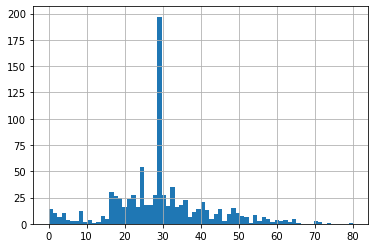

In [28]:
# now all columns are in integer except Embarked column
# plot new Age Values
df['Age'].hist(bins=70)

In [29]:
# as on histogramnwe can see there are fewer elder passenger aged b/w (60-80)
# replacing male and female into numerics using Label Encoder
from sklearn.preprocessing import LabelEncoder
df3=LabelEncoder().fit_transform(df['Embarked'])
df['Embarked']=df3

In [30]:
# with (.get dummies) we can encode all object types ,Here embarked column is treated likewise 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,7,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2
887,1,1,0,19,0,0,30,2
888,0,3,0,29,1,2,23,2
889,1,1,1,26,0,0,30,0


In [31]:
df['Embarked'].unique()

array([2, 0, 1])

#### with help of label encoder we get C=0, Q=1 ,S=2 (encoded according to alphabetical order)

In [32]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
df['Family'] =  df["Parch"] + df["SibSp"]
df['Family'].loc[df['Family'] > 0] = 1
df['Family'].loc[df['Family'] == 0] = 0

In [33]:
# we have assigned passgenger with family member=1 and without family member=0
# drop Parch & SibSp
df = df.drop(['SibSp','Parch'], axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22,7,2,1
1,1,1,0,38,71,0,1
2,1,3,0,26,7,2,0
3,1,1,0,35,53,2,1
4,0,3,1,35,8,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27,13,2,0
887,1,1,0,19,30,2,0
888,0,3,0,29,23,2,1
889,1,1,1,26,30,0,0


### Data visualization

0    549
1    342
Name: Survived, dtype: int64

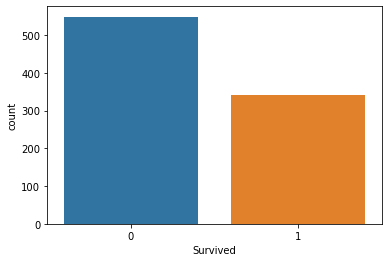

In [34]:
#### Data visualization
sns.countplot(x='Survived',data=df)
df['Survived'].value_counts()


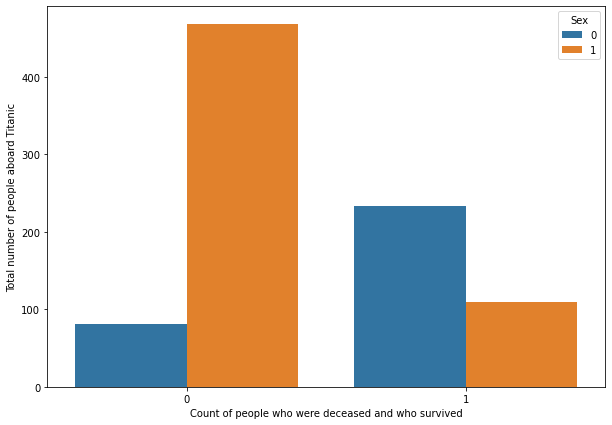

In [35]:
#data seems to be balanced
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Sex' )
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

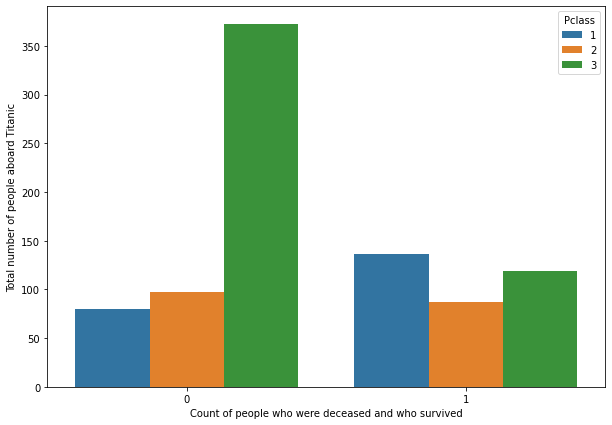

In [36]:
# here we can see a lot of male passenger aborded ans survival rate is low
# but lower female passanger aborted but survival rate is high
# this may indicates that rescue team give preference to females over male(although its just an assumption)
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Pclass' )
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

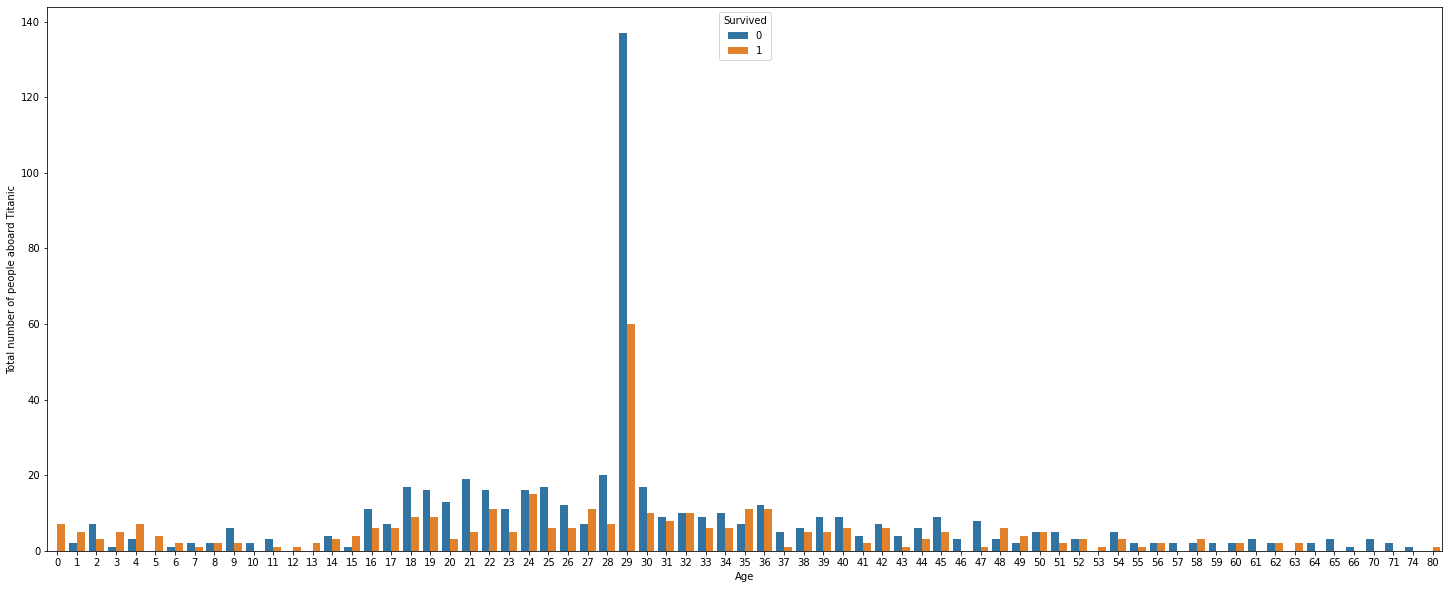

In [37]:
# above graph indicates lower no of class 1 passenger aborded but have higher survival rate(vice-versa for clas 3)
plt.figure(figsize=(25,10))
sns.countplot(x ='Age', data = df, hue='Survived' )
plt.xlabel('Age')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

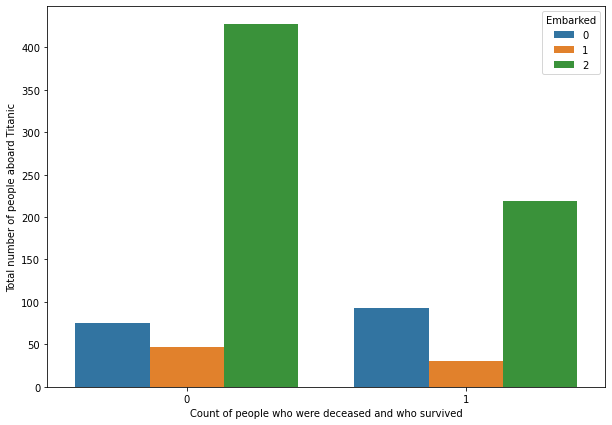

In [38]:
# lower no of passenger were aborded b/w age 60-80 
# survival rates are higher for some specific age (for eg:- 24,27,31,32,35,36,etc)
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Embarked' )
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

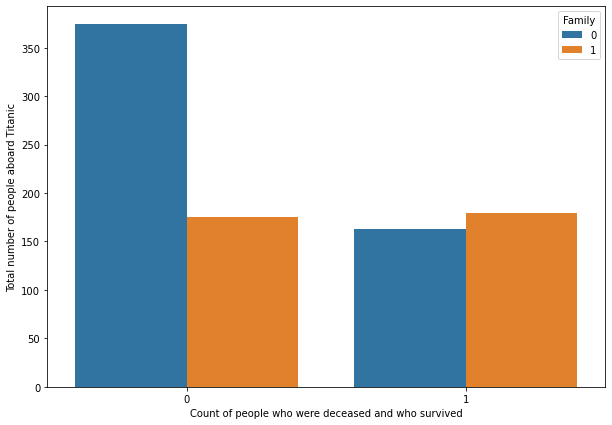

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Family' )
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

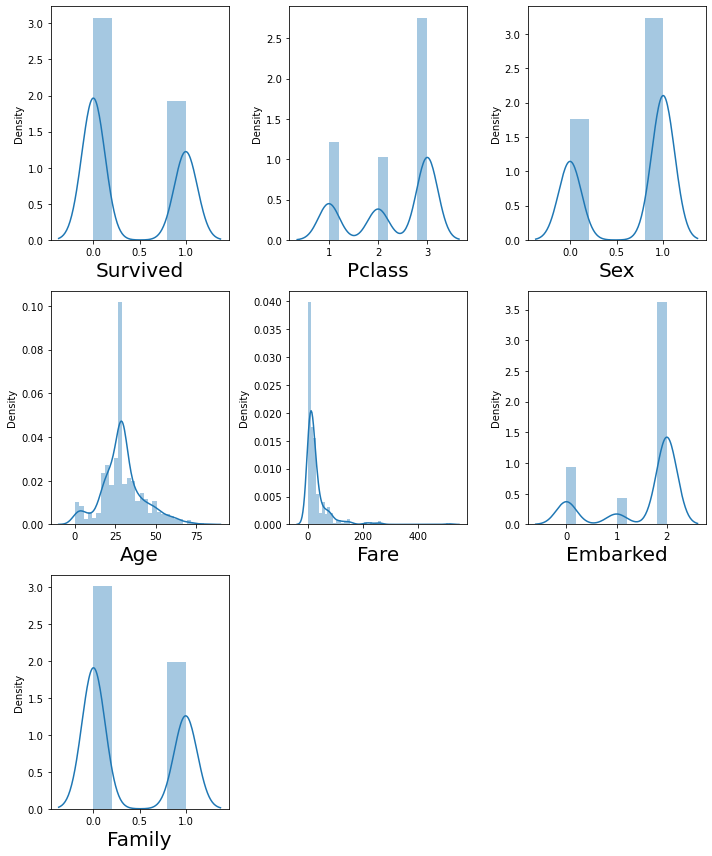

In [40]:
# from above graph = There are fewer passanger with family wrt passenger without family
#(survival of passanger with family have higher survival rate )

#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

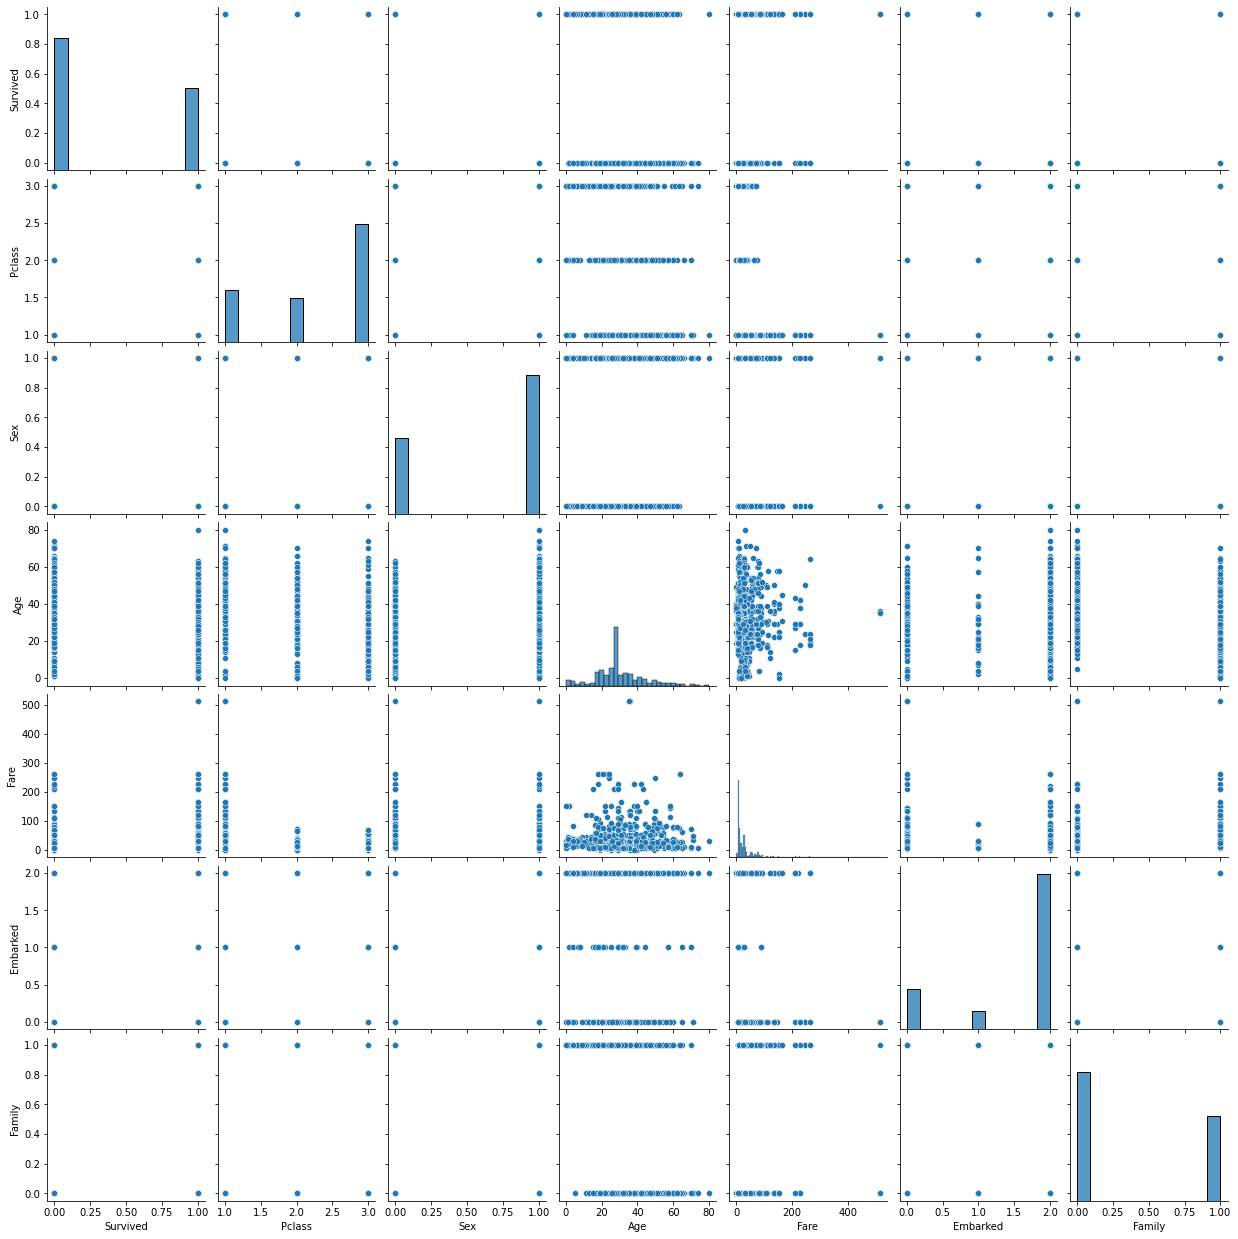

In [41]:
#since all the column are categorical columns except i) age(whose distribution seems to be fine)
# and ii) fare (whose ditribution need some work to achive proper distribution )
sns.pairplot(df)
plt.show()

<AxesSubplot:>

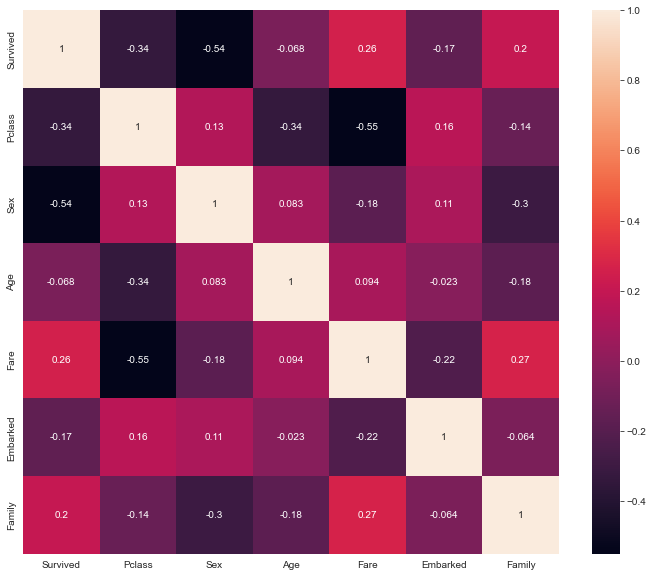

In [42]:
# finding correlation if any
#HeatMap and Correlation

sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

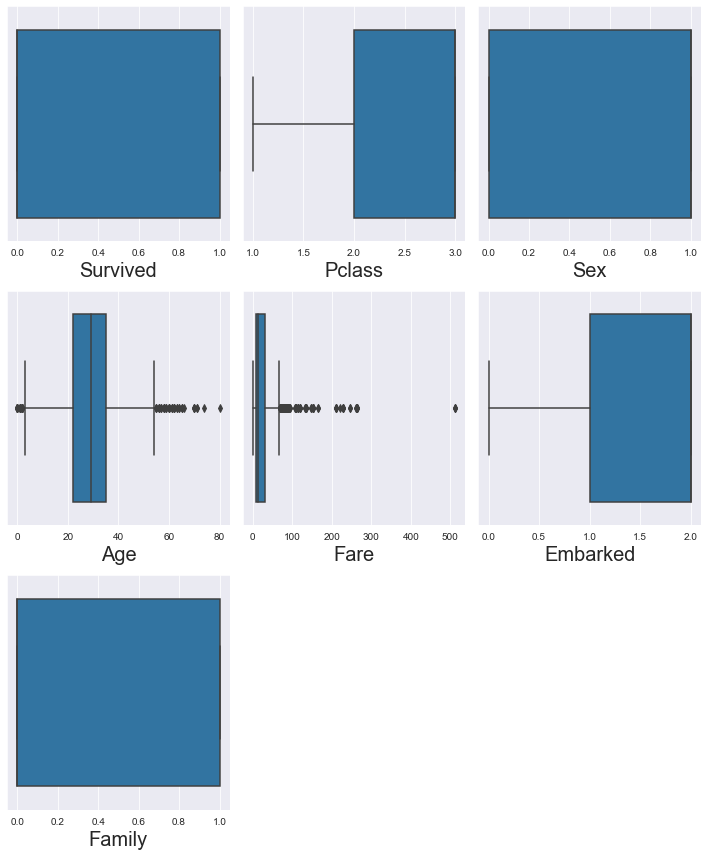

In [43]:
# There is no such correlation found so we'll check for outlier of there is any
#Checking Outliers using boxplot, since data seemrd skeweed


plt.figure(figsize=(10,12))

plotnumber=1

for column in df:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [44]:
# Removing outliers using Quantile menthod in continous data

q = df['Age'].quantile(0.95)
df = df[df['Age']<q]
q = df['Fare'].quantile(0.95)
df = df[df['Fare']<q]


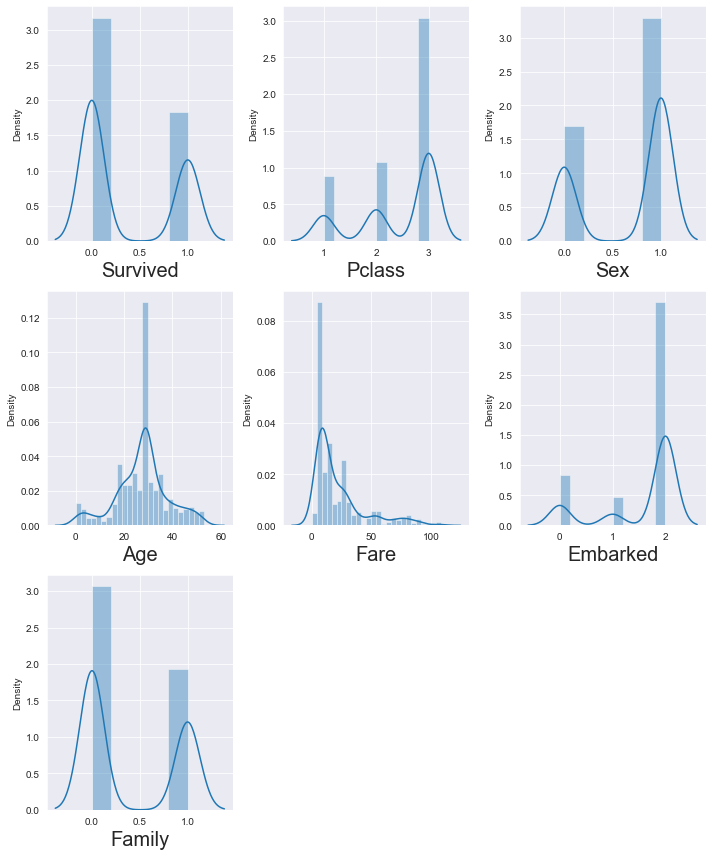

In [45]:
#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [46]:
# now the data seems quiet promicing now we can  proceed

#Splitting feature and target

x = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [47]:
# as we have already imported standard scaler
# lets standardise our feature's 
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [48]:
# finding  random state at which our model will work the best(best random state)
max_accu = 0
max_rs = 0
for i in range(30,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)


Best accuracy is 0.8592964824120602 on Random State 401


In [49]:
# importing diffrent models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
lrsc=lr.score(x_train,y_train)
lrac=accuracy_score(y_test,y_pred)

TRAINING SCORE :  0.7889447236180904
TESTING SCORE :  0.7989949748743719
ACCURACY : 0.7989949748743719
*****************************
[[118  17]
 [ 23  41]]
*****************************
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       135
           1       0.71      0.64      0.67        64

    accuracy                           0.80       199
   macro avg       0.77      0.76      0.76       199
weighted avg       0.80      0.80      0.80       199



In [51]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
dtsc=dt.score(x_train,y_train)
dtac=accuracy_score(y_test,y_pred)

TRAINING SCORE :  0.966499162479062
TESTING SCORE :  0.7587939698492462
ACCURACY : 0.7587939698492462
*****************************
[[113  22]
 [ 26  38]]
*****************************
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       135
           1       0.63      0.59      0.61        64

    accuracy                           0.76       199
   macro avg       0.72      0.72      0.72       199
weighted avg       0.76      0.76      0.76       199



In [52]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rf.score(x_train,y_train))
print('TESTING SCORE : ', rf.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rfsc=rf.score(x_train,y_train)
rfac=accuracy_score(y_test,y_pred)

TRAINING SCORE :  0.966499162479062
TESTING SCORE :  0.7939698492462312
ACCURACY : 0.7939698492462312
*****************************
[[119  16]
 [ 25  39]]
*****************************
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       135
           1       0.71      0.61      0.66        64

    accuracy                           0.79       199
   macro avg       0.77      0.75      0.75       199
weighted avg       0.79      0.79      0.79       199



In [53]:
# KNN

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', knn.score(x_train,y_train))
print('TESTING SCORE : ', knn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
knnsc=knn.score(x_train,y_train)
knnac=accuracy_score(y_test,y_pred)

TRAINING SCORE :  0.8542713567839196
TESTING SCORE :  0.7939698492462312
ACCURACY : 0.7939698492462312
*****************************
[[120  15]
 [ 26  38]]
*****************************
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       135
           1       0.72      0.59      0.65        64

    accuracy                           0.79       199
   macro avg       0.77      0.74      0.75       199
weighted avg       0.79      0.79      0.79       199



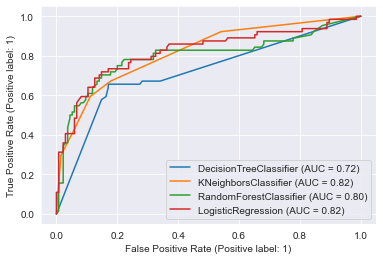

In [54]:
#ploting roc auc
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.show()

#### Here its clear logistic regression works best in this dataset

In [55]:
# now we'll do hyper parameter tuning
# Importing Grid search cv 
from sklearn.model_selection import GridSearchCV
from pprint import pprint

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [56]:
params = {
         'max_iter':range(1,500,5),
         'n_jobs':[-1,0],
         }
grid = GridSearchCV(LogisticRegression()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': range(1, 500, 5), 'n_jobs': [-1, 0]})

In [57]:
best_param = grid.best_params_
best_param

{'max_iter': 6, 'n_jobs': -1}

In [58]:
lr_tuned=LogisticRegression(max_iter=6,n_jobs=-1)
lr_tuned.fit(x_train,y_train)

LogisticRegression(max_iter=6, n_jobs=-1)

In [59]:
y_pred = lr_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr_tuned.score(x_train,y_train))
print('TESTING SCORE : ', lr_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))

TRAINING SCORE :  0.7822445561139029
TESTING SCORE :  0.8040201005025126
ACCURACY : 0.8040201005025126
*****************************
[[118  17]
 [ 22  42]]
*****************************
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       135
           1       0.71      0.66      0.68        64

    accuracy                           0.80       199
   macro avg       0.78      0.77      0.77       199
weighted avg       0.80      0.80      0.80       199



## Efficiency Achieved
##### After hyperparameter tuning we  have achieved increase in model Accuracy , Testing score  and  True Negative Rate

In [60]:
#Model Saving

import joblib
joblib.dump(lr_tuned,'Titanic.pkl')
['Titanic.pkl']

['Titanic.pkl']